### feed forward

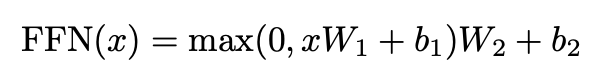!

In [1]:
import torch
import torch.nn as nn

class PositionwiseFeedForward(nn.Module):
    def __init__(self, d_model, d_inner, dropout):
        super().__init__()
        self.w_1 = nn.Linear(d_model, d_inner) # linear transformation (input d -> hidden d)
        self.w_2 = nn.Linear(d_inner, d_model) # hidden d -> input d
        self.dropout = nn.Dropout(dropout) # regularization
    
    def forward(self, x):
        return self.w_2(self.dropout(self.w_1(x).relu()))

### positional encoding

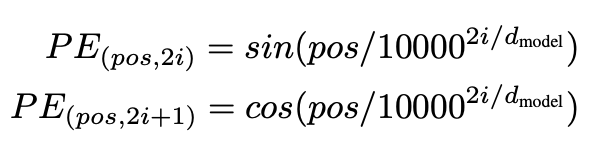

In [2]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout, max_len=5000):
        super().__init__()
        self.dropout = nn.Dropout(dropout)
        
        pos_enc = torch.zeros(max_len, d_model) # [5000x512] (최대길이 한문장)
        pos = torch.arange(0, max_len).unsqueeze(1) # [max_len] -> [max_len,1] (position index)
        div_term = 1/torch.pow(10000, torch.arange(0, d_model, 2)/d_model) # 1/10000^(2i/d_model)
        
        pos_enc[:, 0::2] = torch.sin(pos*div_term)
        pos_enc[:, 1::2] = torch.cos(pos*div_term)
        pos_enc = pos_enc.unsqueeze(0) # batch_dim, max_len, d_model
        self.register_buffer("pos_enc", pos_enc) # pos_enc는 학습되지 않고 고정
        
    def forward(self, x): # batch_dim x seq_len x d_model
        x = x + self.pos_enc[:, :x.size(1)].requires_grad_(False) # pos_enc[:, :seq_len] 까지 잘라서 적용
        return self.dropout(x)

### embedding

In [3]:
import math

class Embeddings(nn.Module): # dim(input/output) -> dim(d_model)
    def __init__(self, vocab_size, d_model):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, d_model) # (vocab_size x d_model) embedding layer 생성
        self.d_model = d_model
    def forward(self, x):
        return self.embed(x) * math.sqrt(self.d_model)